In [504]:
import glob
from datetime import datetime
import OpenSSL
import statistics

def get_version(file_path):
    try:
        with open(file_path) as cert:
            x509 = OpenSSL.crypto.load_certificate(OpenSSL.crypto.FILETYPE_PEM, cert.read())
            return x509.get_version()
    except:
        print("Error parsing version")

certs_paths = glob.glob("/tmp/talhaparacha/cert_data_pem/default/*")
certs_paths = certs_paths + ["/tmp/talhaparacha/cert_data_pem/zmapOriginal/zmapOriginalCerts", "/tmp/talhaparacha/raw_data_pems_2022_correct/", "/tmp/talhaparacha/raw_data_pems_balanced_correct"]
print(certs_paths)

# Get all unique extension names
# all_unique_extension_names = set()
# errors = []
# for path in certs_paths:
#     certs_files = glob.glob(path + "/*.pem")
#     for x in certs_files:
#         try:
#             with open(x) as cert:
#                 if "raw_data" in x:
#                     x509 = OpenSSL.crypto.load_certificate(OpenSSL.crypto.FILETYPE_PEM, "-----BEGIN CERTIFICATE-----\n" + cert.read().split(",")[1])
#                 else:
#                     x509 = OpenSSL.crypto.load_certificate(OpenSSL.crypto.FILETYPE_PEM, cert.read())
                
#                 for y in range(0, x509.get_extension_count()):
#                     all_unique_extension_names.add(x509.get_extension(y).get_short_name().decode())

#         except Exception as e:
#             errors.append(x)
#             print(e)
# print("Errors", len(errors))
# print("Len unique extensions all datasets", len(all_unique_extension_names))

['/tmp/talhaparacha/cert_data_pem/default/balanced-versions-custom', '/tmp/talhaparacha/cert_data_pem/default/zmap-data', '/tmp/talhaparacha/cert_data_pem/default/zmap-data-custom', '/tmp/talhaparacha/cert_data_pem/default/2022-scanned-custom', '/tmp/talhaparacha/cert_data_pem/default/2022-scanned', '/tmp/talhaparacha/cert_data_pem/default/balanced-versions', '/tmp/talhaparacha/cert_data_pem/default/balanced-versions-256-3-0.0002lr-0.1dropout-epoch3-step300000', '/tmp/talhaparacha/cert_data_pem/default/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000', '/tmp/talhaparacha/cert_data_pem/default/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000', '/tmp/talhaparacha/cert_data_pem/default/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000', '/tmp/talhaparacha/cert_data_pem/default/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000', '/tmp/talhaparacha/cert_data_pem/default/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000', '/tmp/talhaparacha/cert_data_pe

In [506]:
import matplotlib.pyplot as plt
import numpy as np

for path_index in range(0, len(certs_paths)):
    print("*******")
    print(certs_paths[path_index])
    certs_files = glob.glob(certs_paths[path_index] + "/*.pem")
    errors = []

    all_extension_values_unique = set()
    num_extensions = []
    versions = []
    all_extensions_this_dataset = []
    validity_days = []
    nB_years = []
    nA_years = []

    for x in certs_files:
        try:
            with open(x) as cert:
                if "raw_data" in x:
                    x509 = OpenSSL.crypto.load_certificate(OpenSSL.crypto.FILETYPE_PEM, "-----BEGIN CERTIFICATE-----\n" + cert.read().split(",")[1])
                else:
                    x509 = OpenSSL.crypto.load_certificate(OpenSSL.crypto.FILETYPE_PEM, cert.read())

                num_extensions.append(x509.get_extension_count())
                versions.append(x509.get_version())

                for y in range(0, x509.get_extension_count()):
                    all_extensions_this_dataset.append(x509.get_extension(y).get_short_name().decode())
                    all_extension_values_unique.add(x509.get_extension(y).get_data())

                nA = datetime.strptime(x509.get_notAfter().decode()[:8], "%Y%m%d")
                nB = datetime.strptime(x509.get_notBefore().decode()[:8], "%Y%m%d")
                validity_days.append(((nA-nB).days))
                nB_years.append(int(x509.get_notBefore().decode()[:4]))
                nA_years.append(int(x509.get_notAfter().decode()[:4]))

        except Exception as e:
            errors.append(x)


    print("Error certs:", len(errors), "Total certs", len(certs_files))
    print("Median extensions", statistics.median(num_extensions))
    print("Version 3 and Version 1 and rest -- ", versions.count(2), versions.count(0), len(versions) - versions.count(2) - versions.count(0))
    print("Unique extensions (including one UNDEF)", len(set(all_extensions_this_dataset)))
    print("Unique extension values", len(all_extension_values_unique))
    print("Median validity duration in days", statistics.median(validity_days))
    print("Median nA years", statistics.median(nA_years))
    print("Median nB years", statistics.median(nB_years))
    print(set(all_extensions_this_dataset))
    
    # Input dictionary
#     x = all_extensions_distribution
#     # for xx in all_extensions_distribution:
#     #     all_extensions_distribution[xx] += 0

#     # Reorder the dictionary to ensure "Z" is the last item
#     x_ordered = {key: x[key] for key in sorted(x.keys(), key=lambda k: k != "UNDEF", reverse = True)}

#     # Create a bar chart
#     fig, ax = plt.subplots(figsize=(1.5, 0.35))  # Adjust the width and height as needed

#     # Extract keys and values from the ordered dictionary
#     keys = list(x_ordered.keys())
#     values = list(x_ordered.values())
#     maximum_val = max(values)

#     # Define colors for each bar
#     colors = ['black' if key != 'UNDEF' else 'red' for key in keys]

#     # Set the width of the bars to reduce the gap
#     width = 1  # Adjust this value to control the width of the bars

#     # Create the bar chart with reduced gap
#     bars = ax.bar(keys, values, width=width, color=colors)

#     # Set the x-axis limits to ensure a minimum at 0 and maximum at
#     ax.set_ylim(0, 10000000)

#     # Remove labels from axes
#     plt.yscale('symlog')
#     ax.set_xticks([])
#     ax.set_yticks([])

#     # Show minor grid lines on the x-axis
#     # Manually set minor tick locations on the x-axis
#     # minor_tick_positions = np.arange(0, len(keys), 0.1)
#     # ax.set_xticks(minor_tick_positions, minor=True)
#     #minor_tick_positions = np.arange(0, 10000000, 0.1)
#     #ax.set_yticks(minor_tick_positions, minor=True)
#     #ax.yaxis.grid(False, which='minor')

#     # Customize minor tick appearance
#     ax.tick_params(axis='x', which='minor', length=0, width=0, direction='out', color='black')
#     ax.tick_params(axis='y', which='minor', length=0, width=0, direction='out', color='black')

#     # Remove borders
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)

#     # Show the plot
#     plt.show()

*******
/tmp/talhaparacha/cert_data_pem/default/balanced-versions-custom
Error certs: 3929 Total certs 64254
Median extensions 0.0
Version 3 and Version 1 and rest --  17204 47050 0
Unique extensions 18
Unique extension values 35101
Median validity duration in days 730
Median nA years 2023
Median nB years 2020
{'ct_precert_scts', 'PKIX', 'ORG', 'nsCertExt', 'authorityInfoAccess', 'nsCertType', 'UNDEF', 'crlDistributionPoints', 'enterprises', 'certificatePolicies', 'subjectAltName', 'basicConstraints', 'holdInstructionCode', 'subjectKeyIdentifier', 'authorityKeyIdentifier', 'nsComment', 'keyUsage', 'extendedKeyUsage'}
*******
/tmp/talhaparacha/cert_data_pem/default/zmap-data
Error certs: 2302 Total certs 82081
Median extensions 7
Version 3 and Version 1 and rest --  80818 1258 5
Unique extensions 38
Unique extension values 33010
Median validity duration in days 3652
Median nA years 2027
Median nB years 2016
{'policyConstraints', 'crlDistributionPoints', 'security', 'certificatePolicies'

Error certs: 800 Total certs 35310
Median extensions 7.0
Version 3 and Version 1 and rest --  34631 678 1
Unique extensions 25
Unique extension values 43397
Median validity duration in days 1837.0
Median nA years 2024.0
Median nB years 2020.0
{'policyConstraints', 'crlDistributionPoints', 'certificatePolicies', 'subjectKeyIdentifier', 'privateKeyUsagePeriod', 'keyUsage', 'certificateIssuer', 'ac-targeting', 'nsComment', 'nsSslServerName', 'nsCertType', 'policyMappings', 'qcStatements', 'authorityKeyIdentifier', 'sbgp-ipAddrBlock', 'biometricInfo', 'extendedKeyUsage', 'ct_precert_scts', 'authorityInfoAccess', 'nameConstraints', 'subjectAltName', 'subjectInfoAccess', 'targetInformation', 'basicConstraints', 'UNDEF'}
*******
/tmp/talhaparacha/cert_data_pem/zmapOriginal/zmapOriginalCerts
Error certs: 0 Total certs 100000
Median extensions 8.0
Version 3 and Version 1 and rest --  98207 1790 3
Unique extensions 29
Unique extension values 92648
Median validity duration in days 2604.0
Median n

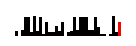

In [461]:
import matplotlib.pyplot as plt
import numpy as np

# Input dictionary
x = all_extensions_distribution
# for xx in all_extensions_distribution:
#     all_extensions_distribution[xx] += 0

# Reorder the dictionary to ensure "Z" is the last item
x_ordered = {key: x[key] for key in sorted(x.keys(), key=lambda k: k != "UNDEF", reverse = True)}

# Create a bar chart
fig, ax = plt.subplots(figsize=(1.5, 0.35))  # Adjust the width and height as needed

# Extract keys and values from the ordered dictionary
keys = list(x_ordered.keys())
values = list(x_ordered.values())
maximum_val = max(values)

# Define colors for each bar
colors = ['black' if key != 'UNDEF' else 'red' for key in keys]

# Set the width of the bars to reduce the gap
width = 1  # Adjust this value to control the width of the bars

# Create the bar chart with reduced gap
bars = ax.bar(keys, values, width=width, color=colors)

# Set the x-axis limits to ensure a minimum at 0 and maximum at
ax.set_ylim(0, 10000000)

# Remove labels from axes
plt.yscale('symlog')
ax.set_xticks([])
ax.set_yticks([])

# Show minor grid lines on the x-axis
# Manually set minor tick locations on the x-axis
# minor_tick_positions = np.arange(0, len(keys), 0.1)
# ax.set_xticks(minor_tick_positions, minor=True)
#minor_tick_positions = np.arange(0, 10000000, 0.1)
#ax.set_yticks(minor_tick_positions, minor=True)
#ax.yaxis.grid(False, which='minor')

# Customize minor tick appearance
ax.tick_params(axis='x', which='minor', length=0, width=0, direction='out', color='black')
ax.tick_params(axis='y', which='minor', length=0, width=0, direction='out', color='black')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()